<a href="https://colab.research.google.com/github/oweskhan77/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


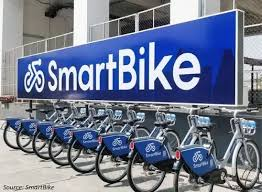

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Defining and Understanding business problem (domain knowledge of business)**

## Rented Bike sharing systems are a means of renting bike where the process of  renting bike and bike return is automated throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on need basis.
## The last couple of years has seen a significant rise in the number of bike share companies popping up across in India also, becuase of :-
* ## Rental bike are Cheaper Than Transit or Car Rental
* ## cost-effective

*   ## It Eliminates the Need for Personal Bike Ownership



* ##  It’s Healthier Than Driving or Riding Transit



 * ## Because rental bike sharing is growing ,so availibility of bike at the right time is really important for companies to serve customer. In this project i have dataset of Seoul city (capital of South Korea) . The dataset contain information like weather condition,holiday,date,number of rented bike count,hours. Based on these data i have to predict bikes count at each hour for the stable supply of rental bikes.
* ## This dataset contain around 8,760 rows of information and each row contain information like weather condition ,holidays or funtioning days ,count of bike required at particular hour on a particular date.
##Using this dataset i have analyze it and also need to creat machine learning model so that i can predict count of bike required at each hour.

*  ## Understanding business problem is really important ,so till now we understand what is the business problem and also what kind of information we have in our dataset and what we have to predict using machine learning model.







In [1]:
#Mounting  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Data Summary**

In [78]:
#load the seol bike data set from drive
df = pd.read_csv('/content/drive/MyDrive/Almabetter/PROJECTS/Bike Sharing Demand Prediction ML Regression/SeoulBikeData.csv',encoding 
                 ='latin')

In [79]:
# we will copy the dataframe to other instance to ensure efficiency if there's a need of change.
df1=df.copy()

In [80]:
# Check first 5 rows of dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [81]:
# Check last 5 rows of dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [82]:
df.shape

(8760, 14)

* Our Datasets has 8760 rows and 14 columns

In [83]:
## Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [84]:
# Another way to get familiar with dataset is checking describe 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [85]:
# Check sum of null values in each columns
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* Our Dataset has no Null Values

In [86]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**Let's convert 'Date' column from object datatype to *datetime* datatype**

In [87]:
df['Date'] = pd.to_datetime(df['Date'])

In [88]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

**Extracting the *date, month & year* from 'Date' column and assigning it to new column respectively**

In [89]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()


In [90]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [91]:
## Let's drop the date column
df = df.drop('Date', axis=1)

In [92]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


# **Exploratory Data Analysis Of The Data Set**

## **Analysation of categorical variables**




#### Yearly

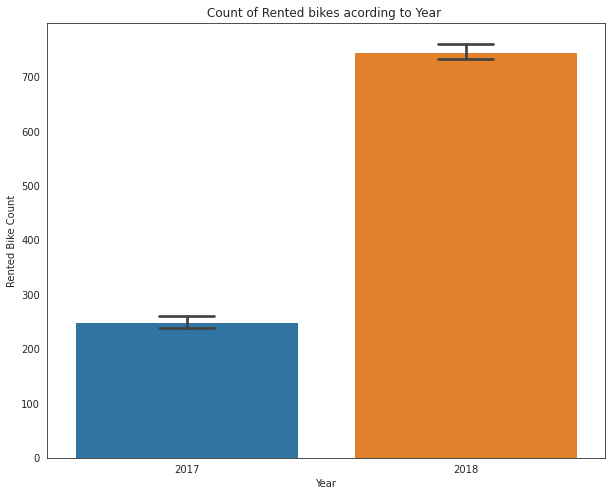

In [93]:
#anlysis of Rented bikes acording to Year 
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=df,x='Year',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Year ')
plt.show()

**Observation:**  

In year 2018 count is increase as compare to 2017 

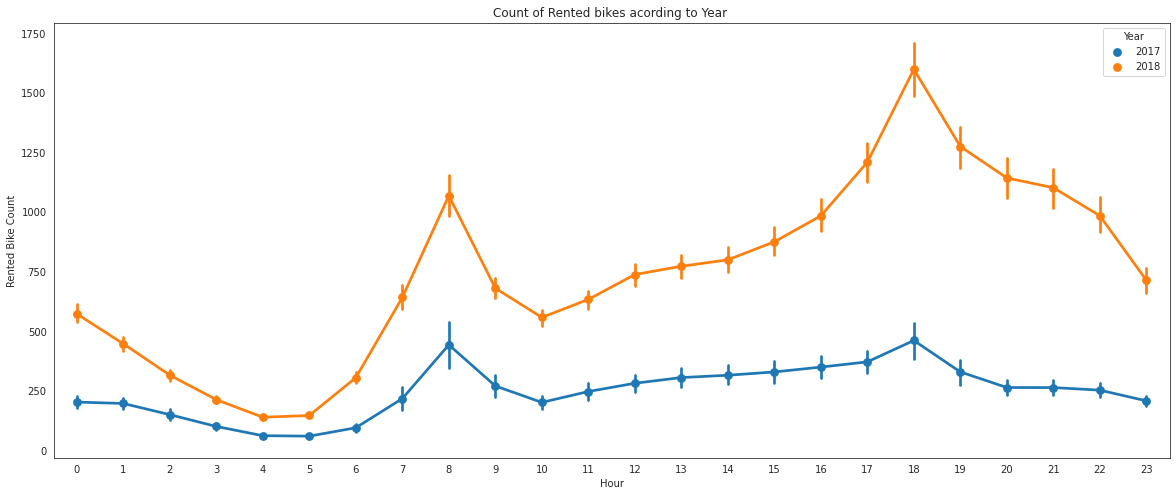

In [94]:
#anlysis of Rented bikes acording to Year
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Year',ax=ax)
ax.set(title='Count of Rented bikes acording to Year ')
plt.show()

**Observation:**

People generally use rented bikes during their working hour from 7 AM - 9 AM to 5 PM- 8 PM more number of bikes rented in 2018 year.

####  Month wise analysis

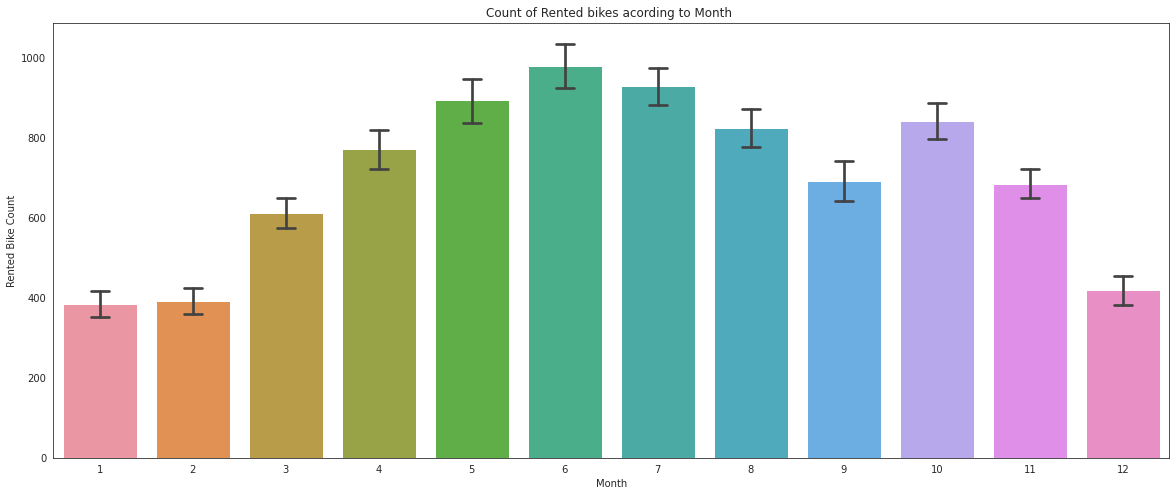

In [95]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.barplot(data=df,x='Month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')
plt.show()

**Observation:**

The demand of the rented bike is high between 5 to 10 months as compare to other months.




#### Weekdays

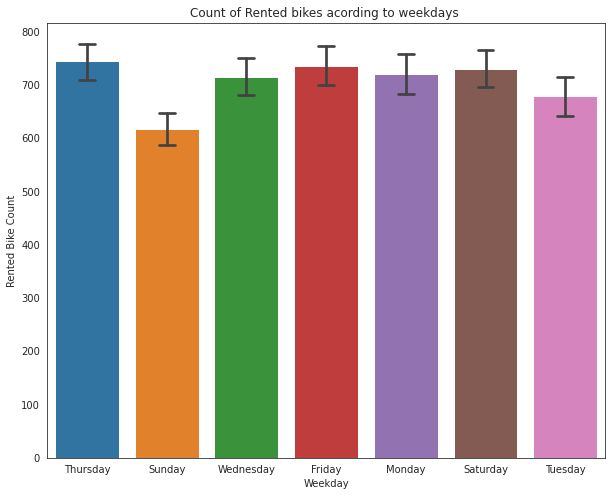

In [96]:
#anlysis of Rented bikes acording to weekdays 
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=df,x='Weekday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays ')
plt.show()

**Observation:-** 

Less count on sunday.

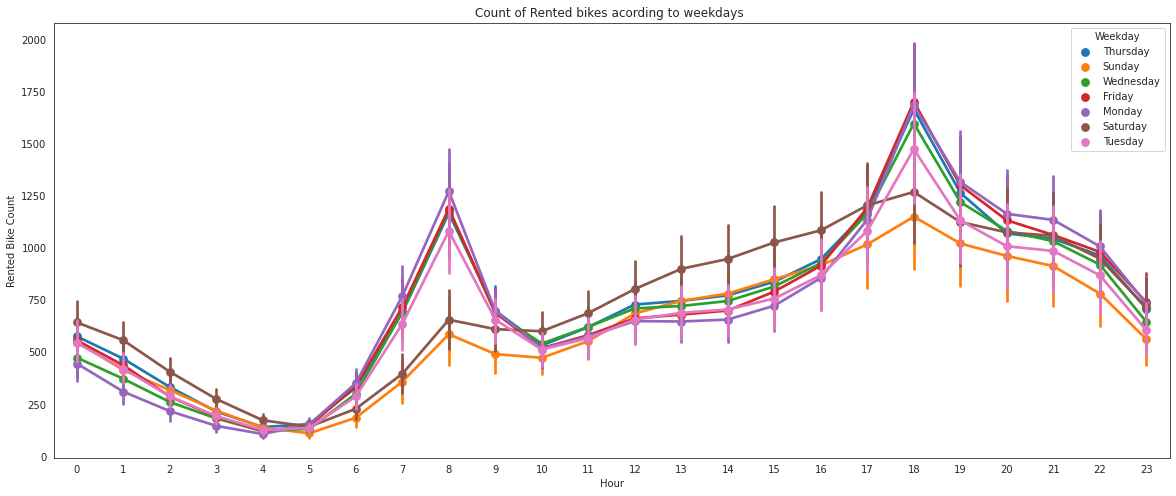

In [97]:
#anlysis of Rented bikes acording to weekdays
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Weekday',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays ')
plt.show()

* Observation 

Same pattern on weekdays and weekendays have differnt pattern.

#### Hour

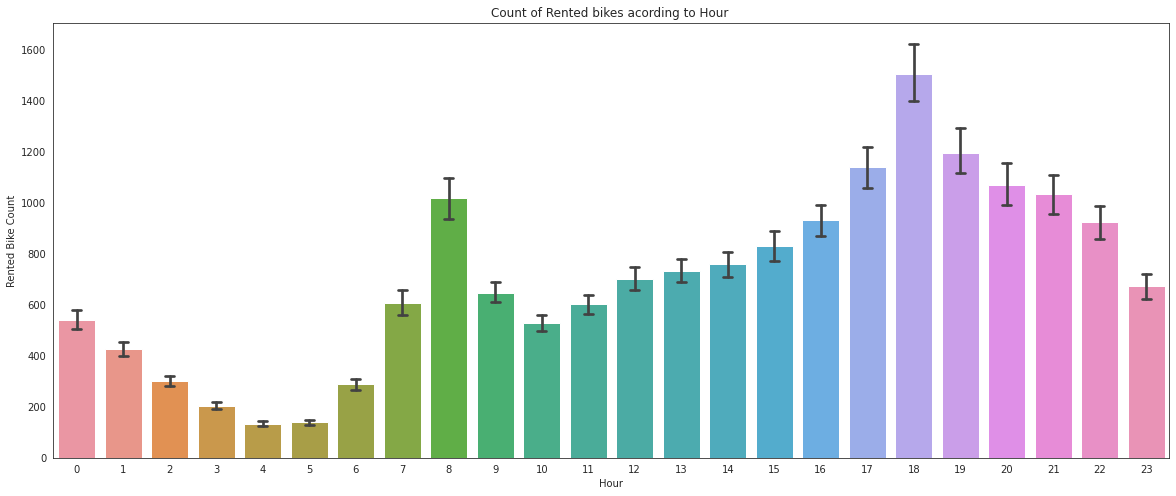

In [98]:
#anlysis of hour
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')
plt.show()

**Observation:**

People generally use rented bikes during their working hour from 7 AM - 9 AM to 5 PM- 8 PM more number of bikes rented as it is working time for the jobs.

#### Functioning Day

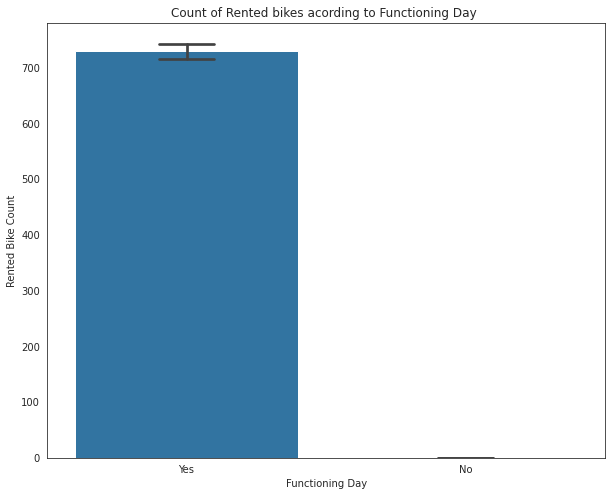

In [99]:
#anlysis of Rented bikes acording to Functioning Day
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')
plt.show()

**Observation:-**

No count on non function Day.

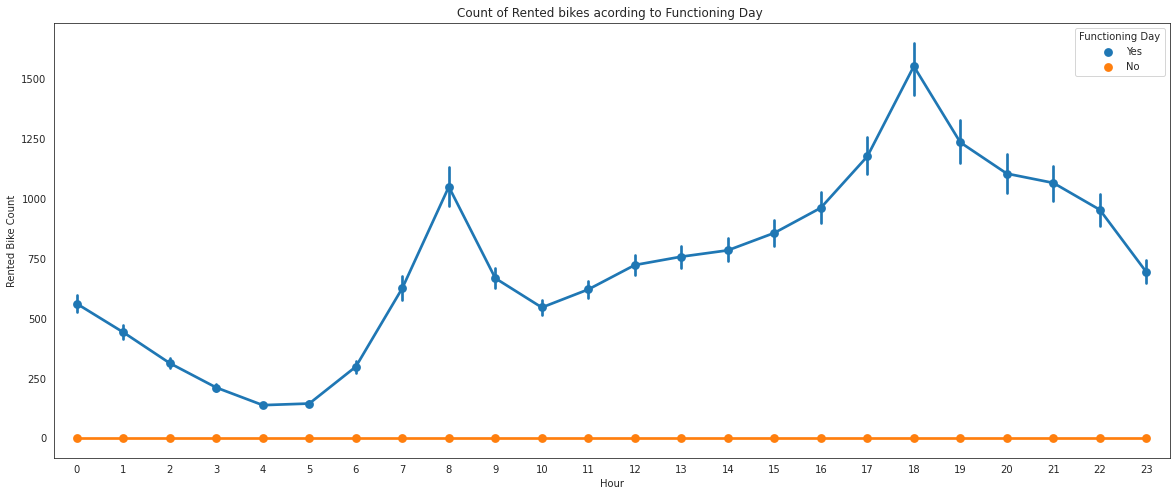

In [100]:
#anlysis of Rented bikes acording to Functioning Day
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')
plt.show()

#### Seasons

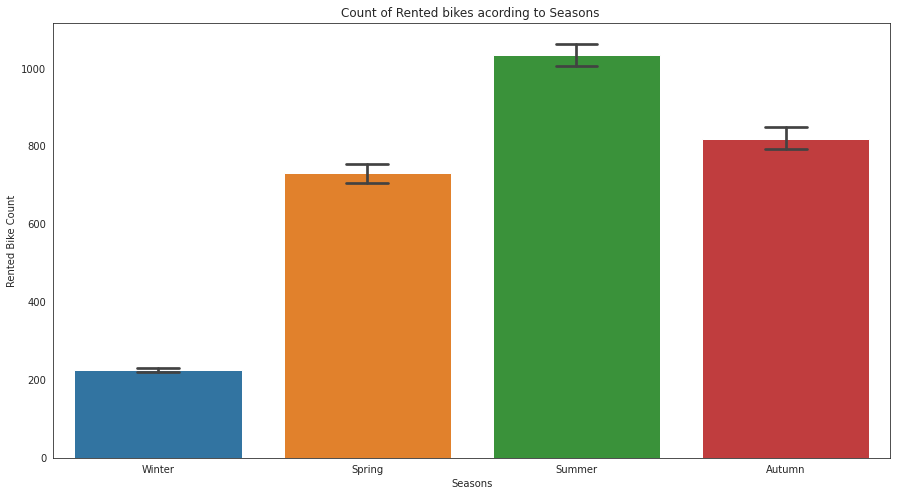

In [101]:
#anlysis of Rented bikes acording to Seasons
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style("white")
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')
plt.show()

**Obeservations:**

Maximum number of bike rentals in Summer season, while in winter season the bike rentend bike count is low.

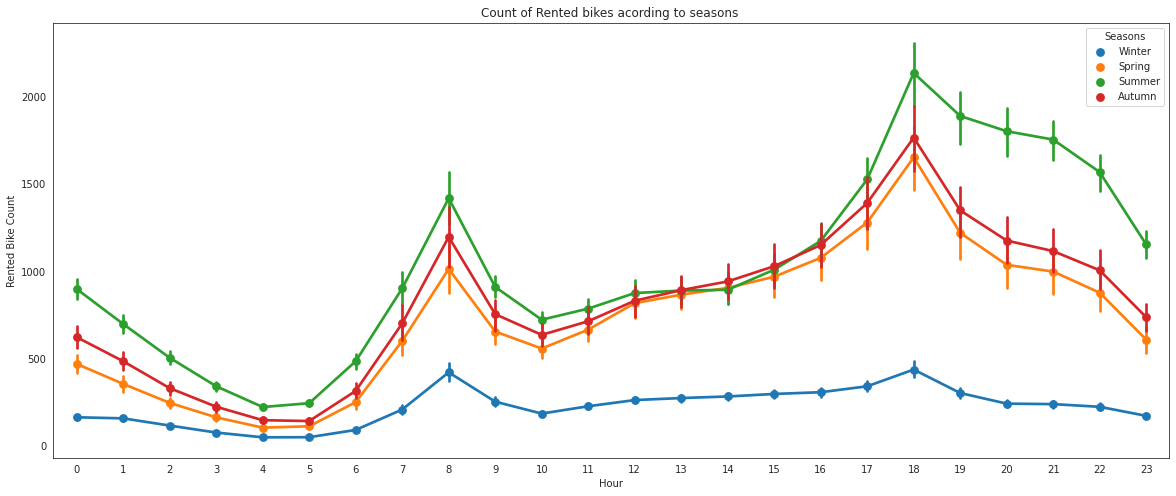

In [102]:
#anlysis of Rented bikes acording to seasons
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')
plt.show()

#### Holiday

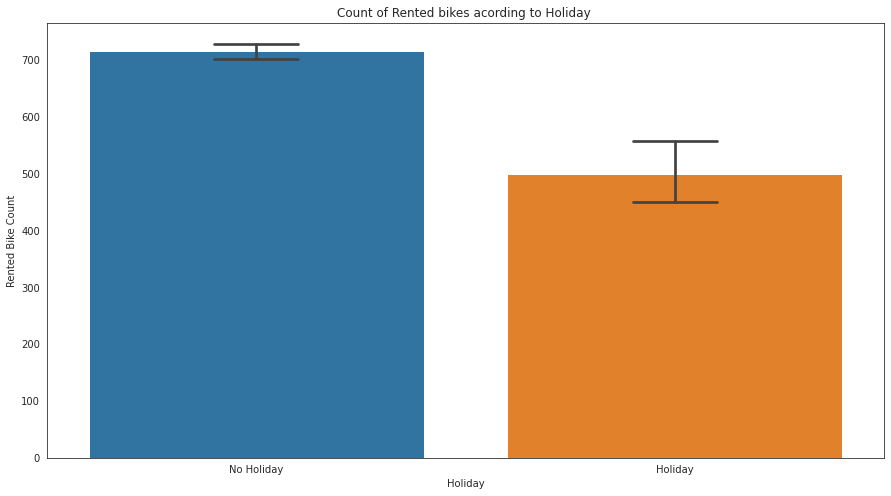

In [103]:
#anlysis of Rented bikes acording to Holiday
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style("white")
sns.barplot(data=df,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')
plt.show()

**Observation:**

Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.

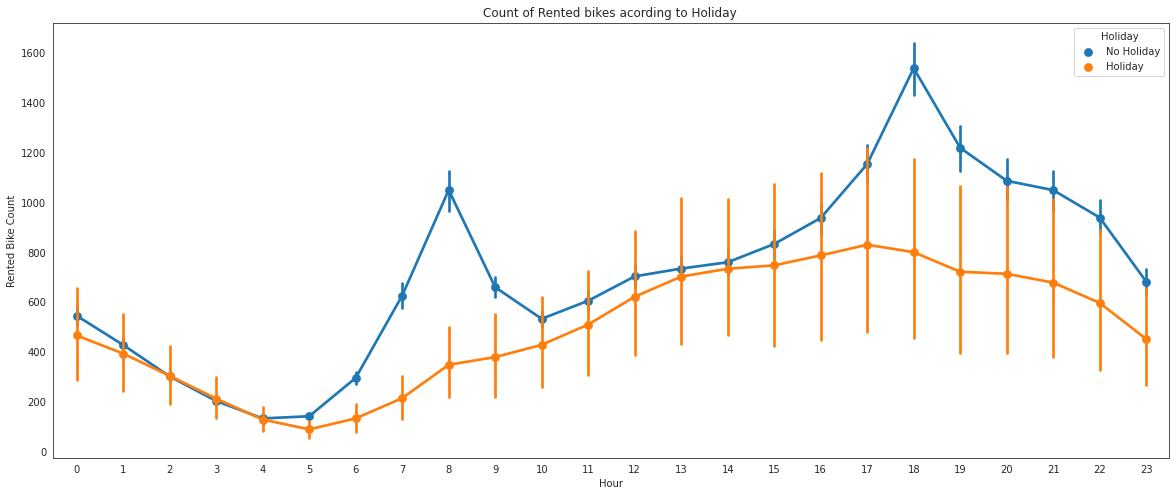

In [104]:
#anlysis of Rented bikes acording to Holiday
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')
plt.show()

**Observation:-**

No holiday means working day so more demand at office time where as on holidays demand less and increses linearly.

#**Feature Engineering**

In [105]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

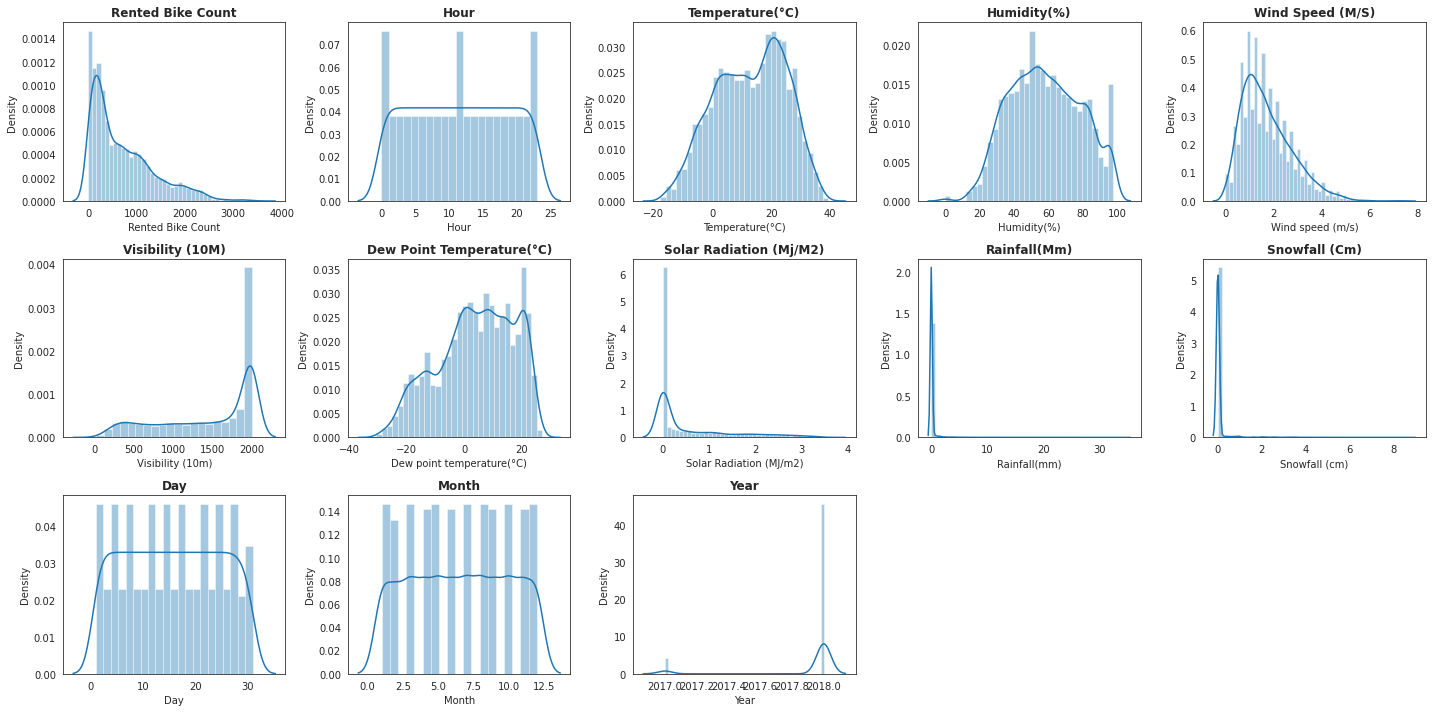

In [106]:
# Visualizing the distribution
plt.figure(figsize=(20,10))
for n, column in enumerate(df.describe().columns):
  plt.subplot(3, 5, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

* We can observe that 'Rented Bike Count', 'Wind Speed', 'Visibility', 'Solar Radiation', 'Rainfall' & 'Snowfall' features are not normaly distributed



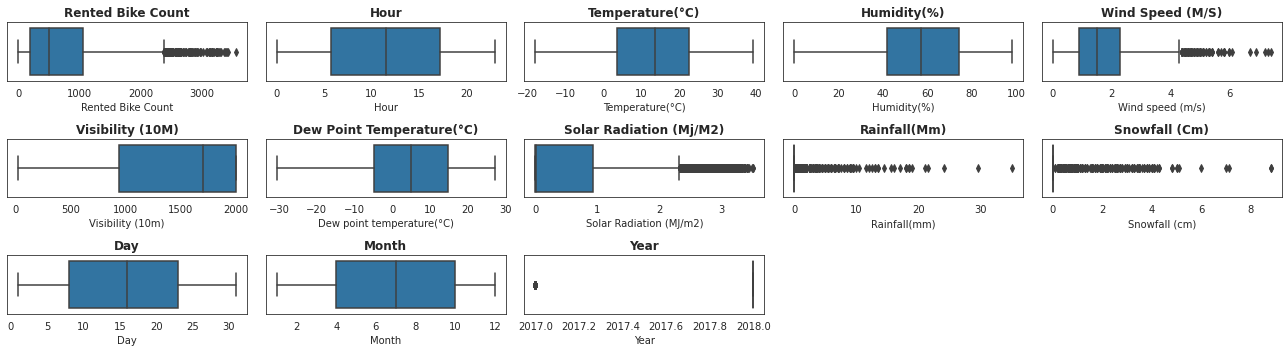

In [107]:
# Visiualizing in boxplot is easyway to find outliers in our dataset
plt.figure(figsize=(18,5))
for n, column in enumerate(df.describe().columns):
  plt.subplot(3, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

**Observation:**

Outliers are not so high range if we treat it it may affect  our model predicition as data is less.

## Regression plot 

In [108]:
numerical_features=[ 'Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
# List of colors in the color palettes
rgb_values = sns.color_palette("Set1", 9)
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))



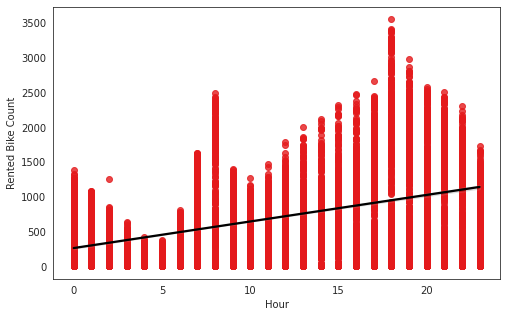

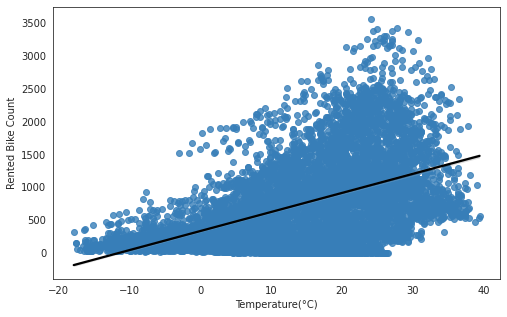

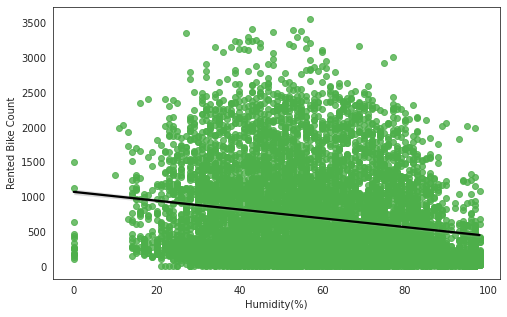

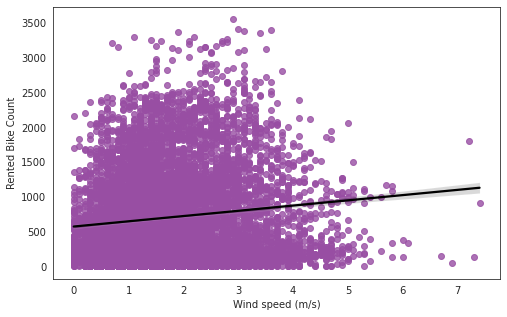

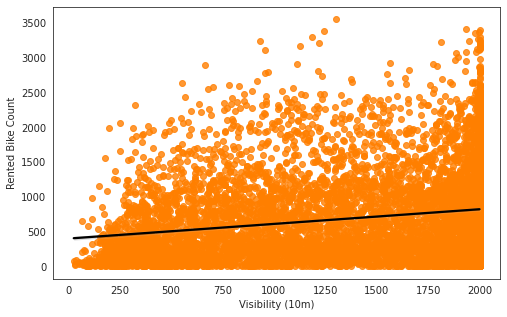

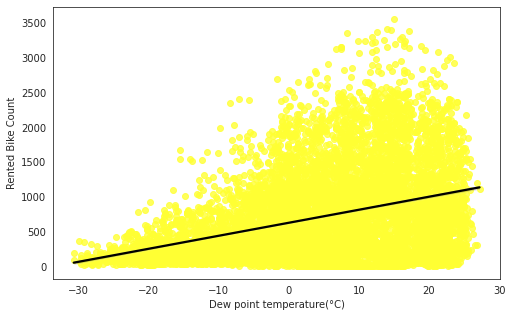

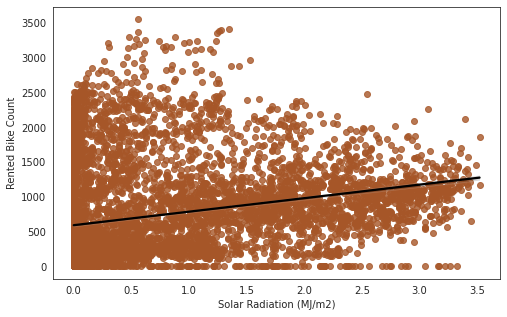

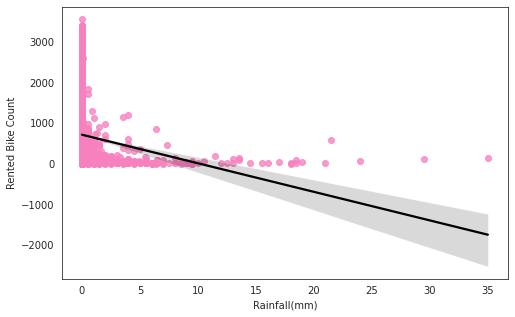

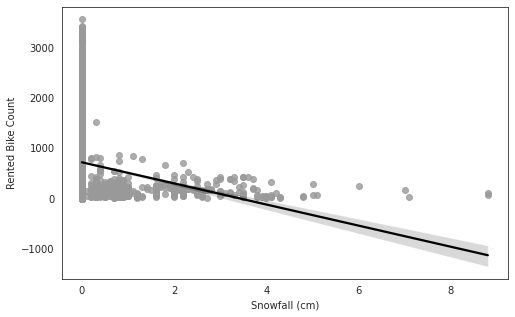

In [109]:
#Reg plots w.r.t different numerical parameters and Rentend Bike Count
plt.rcParams['figure.figsize'] = (8, 5)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=df[col], y = df['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "black"})

* 1]We can obsrrve that, with increase in temperature there's increase in rented bike counts.

* 2]However, more number of bikes are rented if there's low humidity ,if increases rented bike counts falls.

* 3]Also higher the windspeed  higher the number of rented bike counts. 

* 4]Visibility generally don't have much impact but the number of rented bikes are less if there's low visibility. Thus visibility must be more than 500 (10 m) for getting more number of bikes rented.

* 5] Dew point remperature is linearly related to rented bike count as more the dew point temperature, higher the number of bikes rented. 

**Converting Data**

In [110]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [112]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


*Let us now change data type of 'Holiday' and 'Functioning Day' from object to int*

In [113]:
df['Holiday'] = df['Holiday'].map({'No Holiday' : 0, 'Holiday' : 1})
df['Functioning Day'] = df['Functioning Day'].map({'No' : 0, 'Yes' : 1})

In [114]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday


In [115]:
df.shape

(8760, 17)

**Let's check for correlation between our features**

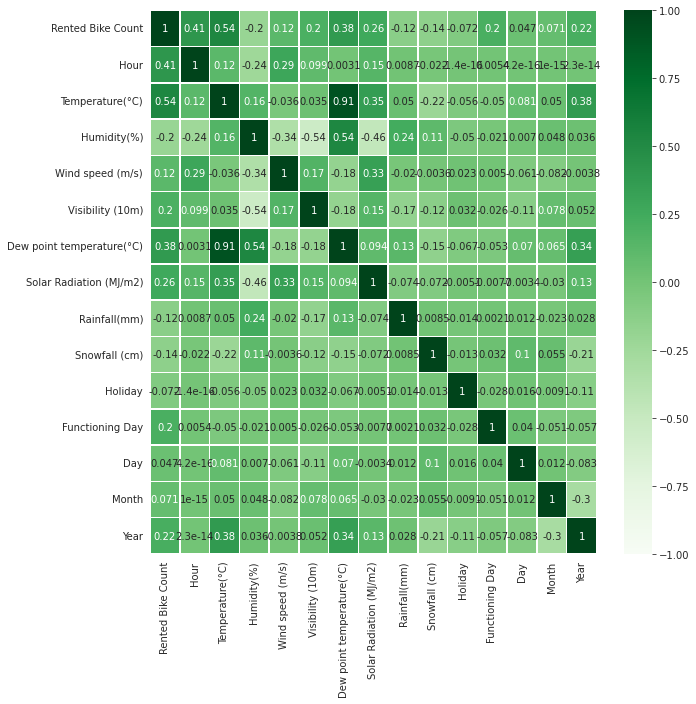

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'Greens')
plt.show()

* We can observe that Dew Point Temperature is highly correlated with Temperaturer. Hence, we will drop dew point temperature*
   

In [117]:
df.drop('Dew point temperature(°C)', inplace = True, axis = 1)


In [118]:
#Making copy of our dataset for any upgrade in future
df2=df.copy()

## What is VIF?
A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

VIF should be less than 5 so that variables are less coreleated.

In [119]:
# import vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Write a function for variance inflation factor(VIF)
def cal_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif.sort_values(by='VIF', ascending=False).reset_index(drop=True))

In [120]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day',
       'Month', 'Year'],
      dtype='object')

In [121]:
# Check VIF for each numerical variable
numerical_features=['Temperature(°C)','Hour', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday']

cal_vif(df[numerical_features])

,variables,VIF
0,Humidity(%),4.878319
1,Visibility (10m),4.730979
2,Wind speed (m/s),4.610685
3,Hour,3.922387
4,Temperature(°C),3.238208
5,Solar Radiation (MJ/m2),2.247281
6,Snowfall (cm),1.121043
7,Rainfall(mm),1.079201
8,Holiday,1.055235


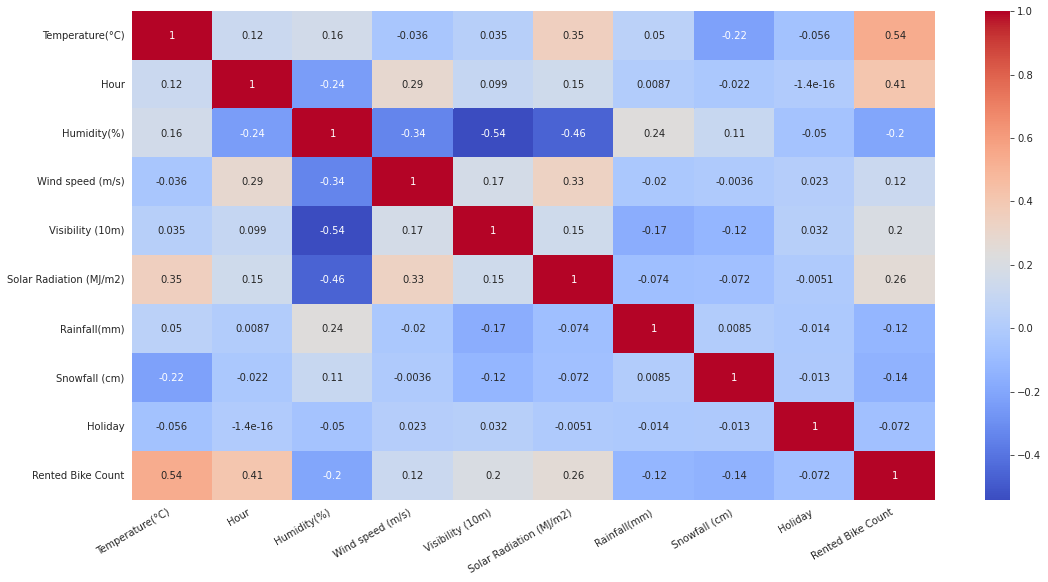

In [122]:
# Let's update data set for our model building
df = df[numerical_features + ['Rented Bike Count']]

# Checking corelation
plt.figure(figsize=(18,9))
plot = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [123]:
df.head()

,Temperature(°C),Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Rented Bike Count
0,-5.2,0,37,2.2,2000,0.0,0.0,0.0,0,254
1,-5.5,1,38,0.8,2000,0.0,0.0,0.0,0,204
2,-6.0,2,39,1.0,2000,0.0,0.0,0.0,0,173
3,-6.2,3,40,0.9,2000,0.0,0.0,0.0,0,107
4,-6.0,4,36,2.3,2000,0.0,0.0,0.0,0,78


## Handling Categorical Features

In [124]:
df = pd.get_dummies(df2, columns = ['Seasons', 'Year', 'Weekday'])
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0


#**Model Training**

In [125]:
# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [126]:
# Data spliting and value assigning to variables for Reggression

X = df.drop(columns = ['Rented Bike Count'] , axis = 1) #Independent Features
y=df['Rented Bike Count'] #Dependent fFeature
y1 = np.sqrt(df['Rented Bike Count'])  # because of skewness we will convert it to normal distribution for linear regression.

##(1) **LINEAR REGRESSION**

In [127]:
# Train test spliting
X_train,X_test,y_train,y_test = train_test_split(X,y1 ,test_size = 0.2, random_state = 0)
print(X_train.shape)
X_test.shape
#Scaling the indepemdemt features to standardization
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

(7008, 25)


In [128]:
# Implement Linear Regression

lr = LinearRegression().fit(X_train,y_train)

In [129]:
# Checking Coefficent

lr.coef_

array([ 3.37756260e+00,  5.66991897e+00, -3.32328979e+00,  1.13804790e-01,
        1.27005047e-01, -7.58233843e-01, -1.68919800e+00, -7.95485468e-03,
       -6.68171531e-01,  4.99742929e+00, -9.12987010e-02, -3.87286092e-02,
       -1.55192885e+11, -1.54959082e+11, -1.55017666e+11, -1.53949394e+11,
       -7.46268582e+11, -7.46268582e+11,  4.42479047e+12,  4.45177630e+12,
        4.51416834e+12,  4.52533275e+12,  4.51416834e+12,  4.53459497e+12,
        4.55484042e+12])

In [130]:
# Checking score

lr.score(X_train,y_train)

0.6553446003715145

In [131]:
# Predicted Train & Test values
 
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [132]:
# Calculating Performance(Evaluation) Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 53.19174406412738
RMSE : 7.293267036392359
MAE : 5.60103870631177
R2 : 0.6553446003715145
Adjusted R2 : 0.6503524885576605


In [133]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

#Creating training Dataframe for comparing later
training_df=pd.DataFrame(dict1,index=[0])

In [134]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 54.014258575701604
RMSE : 7.349439337507427
MAE : 5.673049509794896
R2 : 0.6570223996444029
Adjusted R2 : 0.6520545896740148


In [135]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
#Creating testing Dataframe for comparing later
test_df=pd.DataFrame(dict2,index=[0])

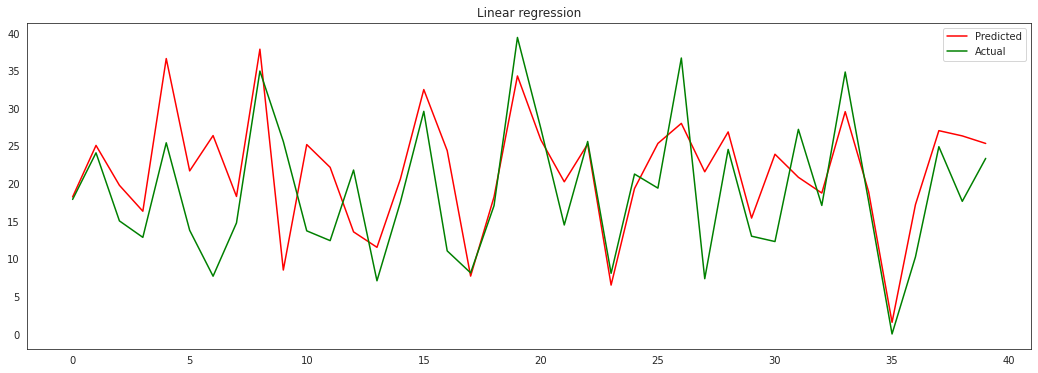

In [136]:
#Plotting the figure
plt.figure(figsize=(18,6))
plt.plot(np.array(y_pred_test)[:40], color='r')
plt.plot(np.array(y_test)[:40], color='g')
plt.legend(["Predicted","Actual"])
plt.title('Linear regression')
plt.show()

## (2)**Polynomial Regression**

In [137]:
# Applying polynomial
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
poly.fit(X_train,y_train)

PolynomialFeatures()

In [138]:
# Predicted Train & Test values
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_pred_train=lr.predict(X_train_poly)
y_pred_test = lr.predict(X_test_poly)
r2_score(y_test,y_pred_test)

0.7636686203064712

In [139]:
# Calculating Performance(Evaluation) Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 33.04928084056067
RMSE : 5.748850392953418
MAE : 4.262401952789473
R2 : 0.7858574992050441
Adjusted R2 : 0.7827557827972377


In [140]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Polynomial regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

#Creating training Dataframe for comparing later
training_df=training_df.append(dict1,ignore_index=True)

In [141]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.21894444151347
RMSE : 6.1007331068908
MAE : 4.4913074860447
R2 : 0.7636686203064712
Adjusted R2 : 0.7602455122576078


In [142]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Polynomial regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
#Creating testing Dataframe for comparing later
test_df=test_df.append(dict2,ignore_index=True)

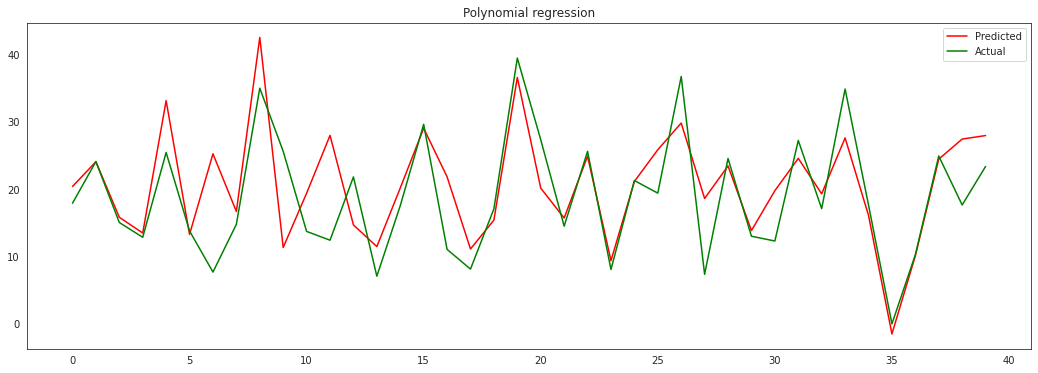

In [143]:
#Plotting the figure
plt.figure(figsize=(18,6))
plt.plot(np.array(y_pred_test)[:40], color='r')
plt.plot(np.array(y_test)[:40], color='g')
plt.legend(["Predicted","Actual"])
plt.title('Polynomial regression')
plt.show()

In [144]:
# Train test spliting
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2, random_state = 0)

##3) **DECISION TREE REGRESSION**

### **Without Gridsearch CV**

In [145]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=10, max_leaf_nodes=1000)

In [146]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=10,
                      max_leaf_nodes=1000)

In [147]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [148]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 20290.85372778228
RMSE : 142.44596774841426
MAE : 85.4867494643508
R2 : 0.9511349915131644
Adjusted R2 : 0.9504272132905857


In [149]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression without GSCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [150]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 85618.50511436266
RMSE : 292.6063996469706
MAE : 173.5860744371091
R2 : 0.7954268001864369
Adjusted R2 : 0.7924636889492763


In [151]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression without GSCV ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

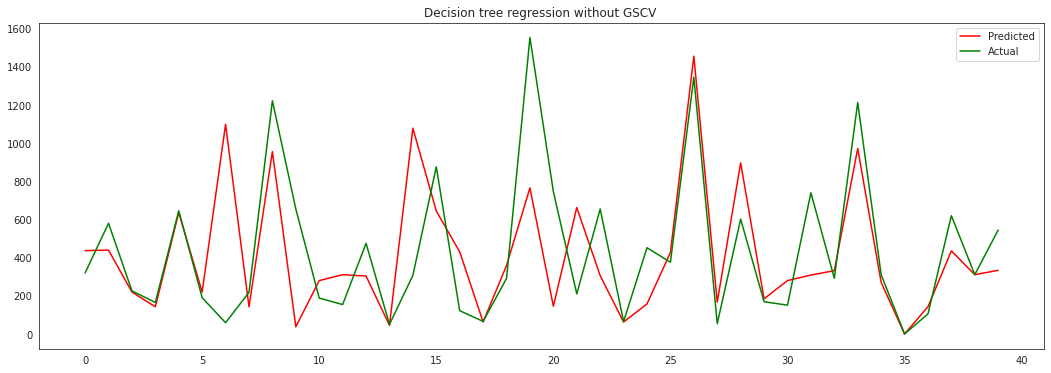

In [152]:
#Plotting the figure
plt.figure(figsize=(18,6))
plt.plot(np.array(y_pred_test_d)[:40], color='r')
plt.plot(np.array(y_test)[:40], color='g')
plt.legend(["Predicted","Actual"])
plt.title('Decision tree regression without GSCV ')
plt.show()

### **With Gridsearch Cross validation**

In [153]:
# Finding best parameters for decision tree
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

#Initilazing the model
dt_regressor = DecisionTreeRegressor()


gs_dt = GridSearchCV(dt_regressor,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_
dt_regressor=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])


In [154]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=4)

In [155]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [156]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37894.65711268774
RMSE : 194.66550057133324
MAE : 118.01697775648286
R2 : 0.9087410137464139
Adjusted R2 : 0.9074191860196817


In [157]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression with GSCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [158]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 67292.54593662864
RMSE : 259.4080683722629
MAE : 159.38623867278002
R2 : 0.8392140644423842
Adjusted R2 : 0.836885183568143


In [159]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression with GSCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

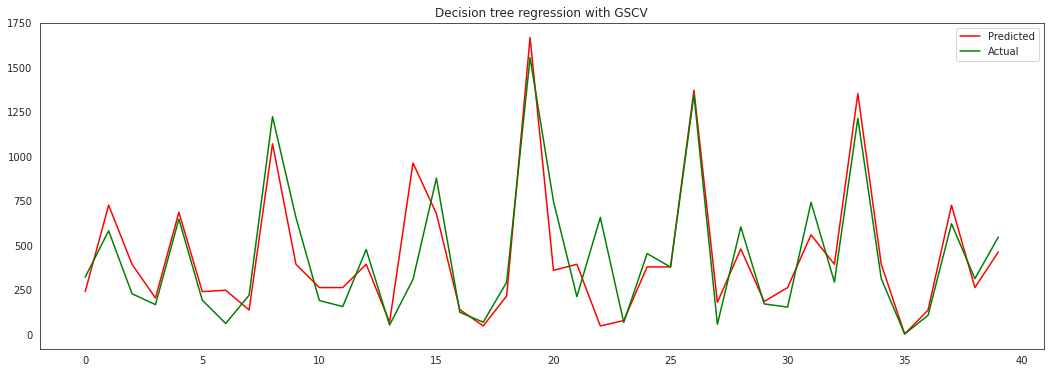

In [160]:
#Plotting the figure
plt.figure(figsize=(18,6))
plt.plot(np.array(y_pred_test_d)[:40], color='r')
plt.plot(np.array(y_test)[:40], color='g')
plt.legend(["Predicted","Actual"])
plt.title('Decision tree regression with GSCV')
plt.show()

## (4) **RANDOM FOREST REGRESSION**

* I apply Randomized SearchCV (Hyperparameter Tunning) for best model

In [161]:
# Implement RF  Model

rfr= RandomForestRegressor()

In [162]:
##Hyperparameter tuning We wil use randomized search
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [163]:
# Using Random search Cv
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rfr,param_distributions = random_grid,cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [164]:
rfr_model = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [165]:
## Priniting the best parameters
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  



In [166]:
##Using the best parameters to train our model
rfr_model_final = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 3, max_features = 'auto', max_depth = 90, bootstrap = True)
rfr_model_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=90, min_samples_leaf=3, min_samples_split=10)

In [167]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [168]:
#Train test values
y_pred_train_rf = rfr.predict(X_train)
y_pred_test_rf = rfr.predict(X_test)

In [169]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 5855.552245390982
RMSE : 76.52158025936855
MAE : 44.96754994292237
R2 : 0.9858984932815139
Adjusted R2 : 0.9856942420254524


In [170]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [171]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 42786.66487488584
RMSE : 206.84937726492154
MAE : 122.94365296803653
R2 : 0.8977673701366966
Adjusted R2 : 0.8962865962394877


In [172]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

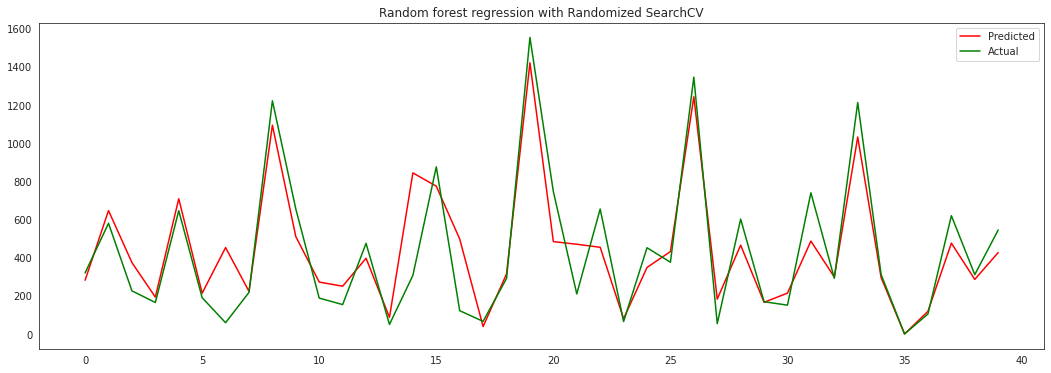

In [173]:
#Plotting the figure
plt.figure(figsize=(18,6))
plt.plot(np.array(y_pred_test_rf)[:40], color='r')
plt.plot(np.array(y_test)[:40], color='g')
plt.legend(["Predicted","Actual"])
plt.title('Random forest regression with Randomized SearchCV')
plt.show()

## (5)**GRADIENT BOOSTING REGRESSION**

We apply GridSearch CV (Hyperparameter Tunning) for best model

In [174]:
gbr = GradientBoostingRegressor()



In [175]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.8, 0.6, 0.4, 0.2],
                  'n_estimators' : [100,500],
                  'max_depth'    : [2,4,6]
              }
gbr_random = RandomizedSearchCV(estimator = gbr,param_distributions = parameters, cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [176]:
gbr_model = gbr_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [177]:
## Priniting the best parameters
print ('Random grid for GBR: ', parameters, '\n')
# print the best parameters
print ('Best Parameters for GBR: ', gbr_random.best_params_, ' \n')

Random grid for GBR:  {'learning_rate': [0.01, 0.02, 0.03, 0.04], 'subsample': [0.8, 0.6, 0.4, 0.2], 'n_estimators': [100, 500], 'max_depth': [2, 4, 6]} 

Best Parameters for GBR:  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.03}  



In [178]:
## Training our model on best parameters
gbr_final_model = GradientBoostingRegressor(learning_rate = 0.03, subsample = 0.8, n_estimators = 500, max_depth =6)
gbr_final_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=500,
                          subsample=0.8)

In [179]:
#Train test values
y_pred_train_rf = gbr_final_model.predict(X_train)
y_pred_test_rf = gbr_final_model.predict(X_test)

In [180]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 10440.193318642428
RMSE : 102.17726419630948
MAE : 67.93274217577584
R2 : 0.9748576308338789
Adjusted R2 : 0.9744934597857021


In [181]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Gradient Boosting Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),3)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [182]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 33298.72775905618
RMSE : 182.4793899569378
MAE : 110.98646123477332
R2 : 0.9204374419024035
Adjusted R2 : 0.9192850294154742


In [183]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Gradient Boosting Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),3)
       }
test_df=test_df.append(dict2,ignore_index=True)

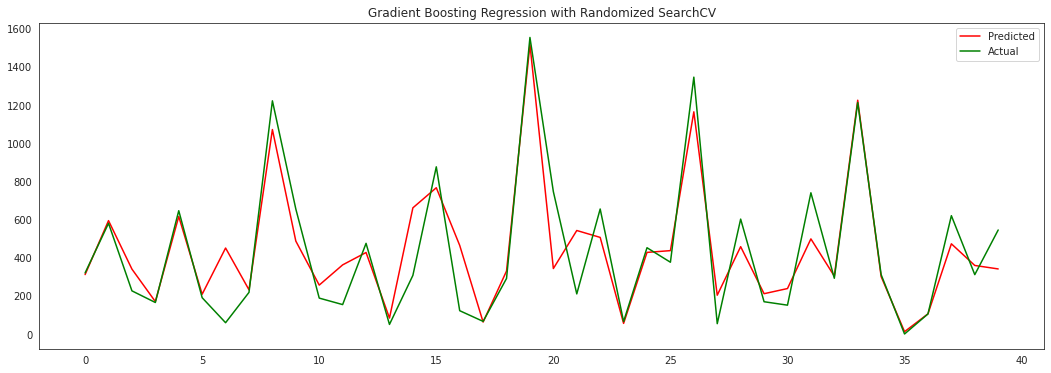

In [184]:
#Plotting the figure
plt.figure(figsize=(18,6))
plt.plot(np.array(y_pred_test_rf)[:40], color='r')
plt.plot(np.array(y_test)[:40], color='g')
plt.legend(["Predicted","Actual"])
plt.title('Gradient Boosting Regression with Randomized SearchCV')
plt.show()

No Overfitting here

**FEATURE IMPORTANCE**

In [185]:
gbr_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=500,
                          subsample=0.8)

In [186]:
gb_optimal_model = gbr_random.best_estimator_

In [187]:
gb_optimal_model.feature_importances_

array([2.91949609e-01, 3.28845133e-01, 8.45726683e-02, 6.06591301e-03,
       1.04423613e-02, 7.76097321e-02, 3.91606282e-02, 8.31254533e-04,
       4.76991024e-03, 7.94271276e-02, 1.33459141e-02, 9.91773905e-03,
       1.65576843e-02, 1.93635271e-03, 1.63026599e-03, 7.12506335e-03,
       2.83223264e-04, 1.51634599e-04, 1.15506751e-03, 2.07507825e-03,
       9.12795197e-03, 9.57867152e-03, 1.30569050e-03, 1.26562780e-03,
       8.69697990e-04])

In [188]:
features = X_train.columns
importance = gb_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

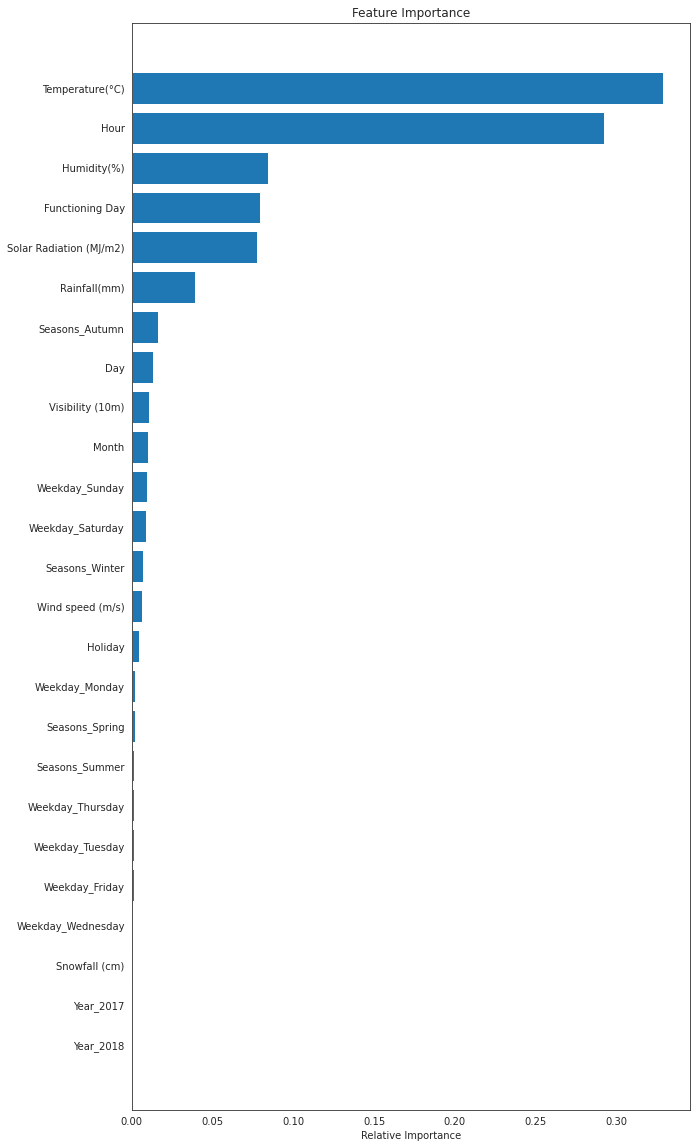

In [189]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index],align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

Here we can say that temperature has a highest weightage
then Hour and humidity.

##**EVALUATION MATERICS FOR TRAINING AND TESTING DATASET (Different models)**

In [190]:
# displaying the results of evaluation metric values for all models

model=pd.concat([training_df,test_df],keys=['Training set','Test set'])
Model_com_df=pd.DataFrame(model)
Model_com_df.columns=['Model',	'MAE',	'MSE'	,'RMSE',	'R2'	,'Adj_R2']
Model_com_df.style.highlight_max(color = 'lightgreen', axis = 0)



#**FINAL OBSERVATION**

1.People generally use more number of rented bikes during from 7 AM - 9 AM and 5 PM- 8 PM  r as it is office start and end time.

2.In summer more number of bikes are rented whereas, winter has the lowest count.

3.Least numbers of bike are rented on sunday as its holiday.

4.More bikes are rented if the humidity is low and wind-speed is high.

5.Rainfall and snowfall impact the number of bikes rented tremendously with very high downfall.

6.we can say that temperature has a highest weightage then Hour and humidity.

7.Linear regression is not suitable for our problem as it makes many assumptions and our dataset is prone to it. Thus, linear regression gives us the lowest r2-score and highest rmse.

8.Out of all above models Gradient Boosting Regressor gives the highest R2 score of 97.5% for Train Set and 92.0% for Test set and no overfitting is seen.




